# Predicting success of a person applying for a loan

## Introduction

In this project, I am going to build a machine learning model that can predict whether someone applying for a loan will be approved by the bank. Thousands of people everyday apply for loans and this prediction model can be used by people applying to see if they have a chance of successfully gaining a loan from a bank, instead of wasting their time applying and being rejected. In addition, this model could be used by banks to flag which individuals should be given loans which can then be futher investigated manually by proper loan-approvers.

## Setting up code (ie imports etc)

In [187]:
import pandas as pd
import seaborn as sns


loan_data = pd.read_csv("LoanApprovalPrediction.csv")


**Panda library** will be used to load dataframes and read csv files.

**Seaborn library** will be used to help us work out the correlation between different features.

## Data Preprocessing

Let us see what the first few rows of the data set look like

In [188]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [189]:
updated_data= loan_data.drop('Loan_ID',axis=1)

LoanID is a feature that is unnecessary is training a machine learning model as the data in this column will not affect whether someone's loan is accepted. In the next code section I will remove this column.

The columns for the data set are :

In [190]:
data_columns = updated_data.columns
print(data_columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [191]:
updated_data.shape

(598, 12)

In [192]:
updated_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Transformation

For each feature that contains categorical values, we need to replace it with numerical values ie 1 from true and 0 for false.

In [193]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
categorical_features = (updated_data.dtypes == "object")
for feature in list(categorical_features[categorical_features].index):
    updated_data[feature] = encoder.fit_transform(updated_data[feature])

In [194]:
updated_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Visualising correlations

<Axes: >

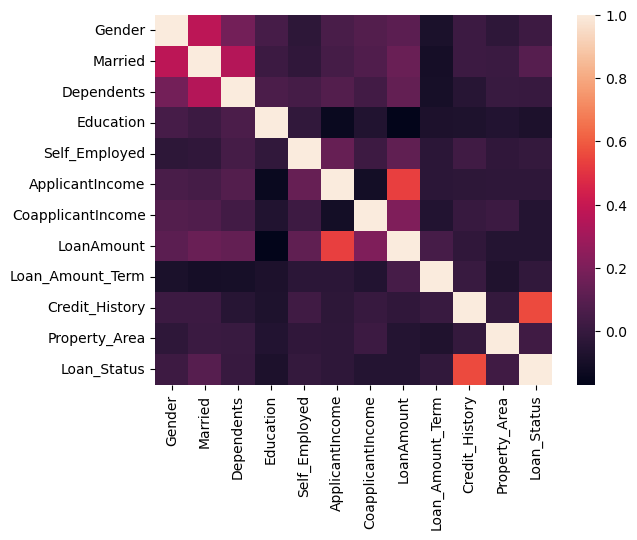

In [195]:
sns.heatmap(updated_data.corr())

In [196]:
values = updated_data.corr()
values['Loan_Status']

Gender               0.021239
Married              0.093183
Dependents           0.003048
Education           -0.081617
Self_Employed       -0.005605
ApplicantIncome     -0.025248
CoapplicantIncome   -0.058194
LoanAmount          -0.055643
Loan_Amount_Term    -0.017554
Credit_History       0.557308
Property_Area        0.028315
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

From the heatmap we can see the factor that affects whether a loan approved the most is credit_history, from the coefficients we can see the features that are the least important to whether a loan is approved is no of dependents and whether they are self employed or not.

### Data cleaning

In [197]:
updated_data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

The code above tells us how much data is missing and in which features. So we can see that the dependant, loan_amount , loan_amount_term and credit_history columns are all missing data. We have to deal with this otherwise it will affect the accuracy of our model. I have decided to use imputation methods to replace the missing data, the alternative solution is to delete all rows of missing information. However, this is not a good solution as we will lose valuable data, instead by using imputation methods we can still use the rows of data with missing values as they will be replaced. I will use a more advance imputation technique by using the IterativeImputator method in python which will create a model that uses the values of the other features to predict an appropriate value for any missing data.

In [198]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.datasets import make_regression

In [199]:
# initialising the iterative imputer 
iterative_imputer = IterativeImputer(random_state=0)

#code will replace all missing values with predicted values
imputed_data = pd.DataFrame((iterative_imputer.fit_transform(updated_data)),columns=data_columns)


In [200]:
imputed_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In the code above, I have replaced all missing values with synthetic data, then the last code box checks that there is no missing data in the corrected dataframe which we can see is true.

In [201]:
imputed_data = imputed_data.drop(['Dependents','Self_Employed'],axis=1)
imputed_data.head()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,5849.0,0.0,137.381018,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0


In the code snippet above, I removed the self employment and dependent column as they had the lowst correlation to loan_status.

### Splitting data into train and test set

In [202]:
from sklearn.model_selection import train_test_split
output = imputed_data['Loan_Status']
input = imputed_data.drop(columns=['Loan_Status'])
X_train, X_test,y_train,y_test = train_test_split(input,output,test_size = 0.3, random_state = 1)

## Training Machine learning model

This is a binary classification problem so there are 3 models we can use:

+ Decision Tree
+ Naive Bayes
+ Support Vector machines 
+ Logistic Regression

I chose not to used Naive Bayes and Logistic regression model because the logistic regression model only works the best when relationships are linear which may not be the case with this data. Futhermore Naive Bayes model assumes that all features of the data are independent, this assumption is most likely not accurate in our dataset so I believe it is inappropriate to use this model. I have also not chosen to use SVC because the dataset is not high dimensional which is the data that works best for training this model.

Therefore, I have chosen to use a Decision Tree model to train my data with.


### Decision Tree model 

In [203]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [204]:
from sklearn.metrics import accuracy_score
def get_accuracy(model):
    predictions = model.predict(X_test)
    return accuracy_score(y_test,predictions)

In [205]:

predictions = model.predict(X_test)

print(f"The accuracy of the model is {(round(get_accuracy(model),2))*100}%")

The accuracy of the model is 72.0%


Add text here

### Improve accuracy of model

In [211]:
nodes = [10,20,25,50,100,150,200]


model = DecisionTreeClassifier(max_depth=nodes[0],random_state=0)
model.fit(X_train,y_train)
num = 0
highest_accuracy = get_accuracy(model)
print(f"The accuracy for {nodes[0]} max nodes is {round(highest_accuracy,2)*100}%")
for i in range(1,len(nodes)):
    model = DecisionTreeClassifier(max_depth=nodes[i],random_state=0)
    model.fit(X_train,y_train)
    count = get_accuracy(model)
    print(f"The accuracy for {nodes[i]} max nodes is {round(count,2)*100}%")
    if count > highest_accuracy:
        highest_accuracy = count
        num = i

print(f"\nThe max number of nodes with the best accuracy is: {nodes[num]}")

The accuracy for 10 max nodes is 76.0%
The accuracy for 20 max nodes is 71.0%
The accuracy for 25 max nodes is 72.0%
The accuracy for 50 max nodes is 72.0%
The accuracy for 100 max nodes is 72.0%
The accuracy for 150 max nodes is 72.0%
The accuracy for 200 max nodes is 72.0%

The max number of nodes with the best accuracy is: 10


In [207]:
improved_model = DecisionTreeClassifier(max_depth=nodes[num],random_state=0)
improved_model.fit(X_train,y_train)
print(f"The accuracy of the model is {(round(get_accuracy(improved_model),2))*100}%")


The accuracy of the model is 76.0%


### Pruning a Decision tree

In [213]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha_list = path.ccp_alphas
impurities_list = path.impurities

highest_accuracy = 0
best_model = None
best_alpha = 0
for ccp_alpha_num in ccp_alpha_list:
    pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha_num, max_depth=nodes[num])
    pruned_tree.fit(X_train,y_train)
    model_accuracy = get_accuracy(pruned_tree)
    if model_accuracy > highest_accuracy:
        best_model = pruned_tree
        highest_accuracy = model_accuracy
        best_alpha = ccp_alpha_num

print(f"The highest accuracy of the model is {(round(highest_accuracy,2))*100}%")

The highest accuracy of the model is 85.0%


In the code above, we have pruned the tree this means that certain nodes have been removed from the tree. This is useful, as it stops the data being overfit this means that the predicitions will be more accurate as we can see the accuracy score for the best pruning model shot up from 76% to 85%. 

## Final model Code

In [209]:
final_model = best_model

This variable is created so it can be used in the python file where user inputs are taken.

## References

The dataset used can be found at geeksforgeeks.org by clicking this link 

https://drive.google.com/file/d/1LIvIdqdHDFEGnfzIgEh4L6GFirzsE3US/view

Websites I used in helping me write the code:
The project was inspired and some code is used from this website https://www.geeksforgeeks.org/machine-learning/loan-approval-prediction-using-machine-learning/.

The code written to prune the decision trees was inspired by the code from this link https://www.geeksforgeeks.org/machine-learning/pruning-decision-trees/
and https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html.

The website I used to help me write the code to replace missing data https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html.



